# **Prediction using Supervised Learning**
*   In this task we will **predict the percentage of marks** that a student is expected to score based on the number of hours they studied. 
*   This time, we will use **simple linear regression** task as it involves just 2 variables.

## Author : Vyrda Maharany

In [ ]:
# Importing the libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading the data from remote link
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Undestanding the data**

In [ ]:
# check the basic features and the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are two features such as Hours and Scores and 25 data non-null. 

In [ ]:
# check the statistics summary
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# check for duplicated data
data.duplicated().any()

False

There are no duplicated data and missing values. So, we will **show the correlation** between *Hours* and *Scores* through visualization data.

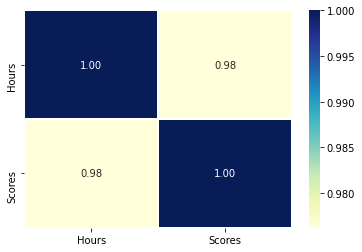

In [ ]:
# Visualization the correlation using heat map
corr = data.corr()
f, ax = plt.subplots()
ax = sns.heatmap(corr, annot=True, fmt=".2f", linewidths=1, ax=ax, cmap="YlGnBu")

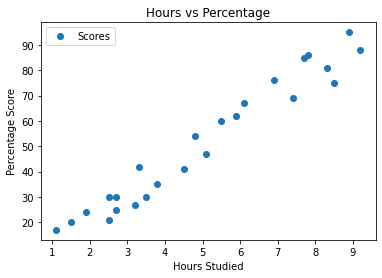

In [ ]:
# Visualization the correlation using scatter plot
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')    
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the visualization above, we can see that there is **a high correlation**  and **a positive linear relationship** between the number of hours studied and the percentage of the score.

# **Preparing The Data**

In the next step, we will **divide the data into independent variables and dependent variables**. The task is **predicting the percentage of marks that a student is expected to score based upon the number of hours they studied**.So, **Hours** will be **the independent variable** and **Scores** will be **the dependent variable**.

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Then, we will split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# **Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

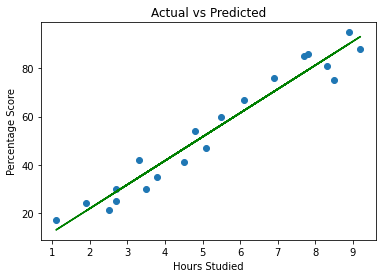

In [ ]:
# Plotting the regression line in the training data set.
line = regressor.coef_*X_train+regressor.intercept_
plt.scatter(X_train, y_train)
plt.plot(X_train, line, color='green')
plt.title('Actual vs Predicted') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
# find the slope and the intercept of the simple regression linier

Intercept = regressor.intercept_
Slope = regressor.coef_
print(Intercept, Slope)

2.018160041434662 [9.91065648]


From the value of the Intercept and the Slope, we can construct the relationship between Hours and Score is given by this equation : 
**Score = 2.018160041434662 + 9.91065648* Hours**

# **Making Predictions**
We have trained our algorithm, then we will make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted using table
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


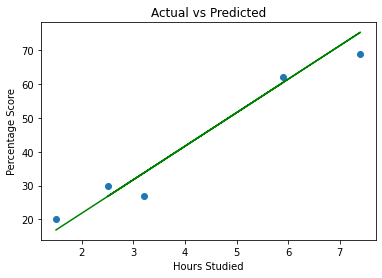

In [ ]:
# Comparing Actual vs Predicted with visualization

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='green')
plt.title('Actual vs Predicted') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
# You can also test with your other data
hours = [[7]]
own_pred = regressor.predict(hours)
print("Using the simple linear regressio, if our duration of study is",hours[0], "then we will get", own_pred)

Using the simple linear regressio, if our duration of study is [7] then we will get [71.39275541]


# **Evaluating the model**

The final step is to evaluate the performance of the chosen supervised learning. This step is important to know how fit the model performs on a particular dataset. In this task, we have chosen the mean square error. 

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


Then, We will create **the residual plot** to represent the error between the actual values. Examining the predicted value and actual value, we see a difference. We obtain that value by subtracting the predicted value and the actual target value.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residual')

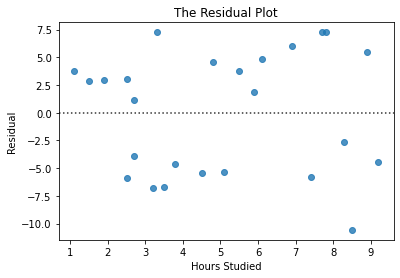

In [ ]:
ax = sns.residplot(data['Hours'],data['Scores'])
ax.set_title('The Residual Plot') 
ax.set_xlabel('Hours Studied')  
ax.set_ylabel('Residual')  

From the residual plot, The plot is distributed evenly around the x-axis with similar variance then the linear model is appropriate.